#  LSTM

# Closing Price Prediction.

Close price is the price of stock at the end of trading day

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, datasets, layers
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd
import time
import os
# import pywhatkit
import matplotlib.pyplot as plt
# from warnings import simplefilt

In [2]:
#https://scikit-learn.org/0.18/modules/generated/sklearn.preprocessing.Imputer.html
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

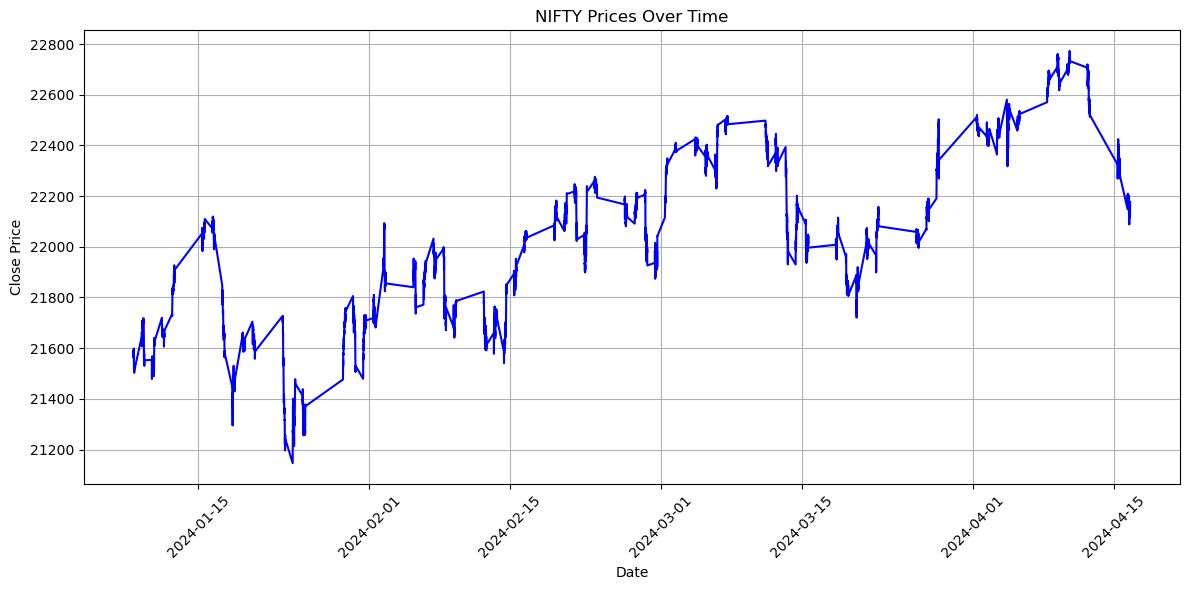

In [4]:
#https://chat.openai.com/share/683586d6-d215-4694-85ca-6844228af88b
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define NIFTY symbol
nifty_symbol = 'NIFTY'
folder_name = 'Daily_historical_data1'
file_name = f'{nifty_symbol}.csv'
file_path = os.path.join(folder_name, file_name)

# Read the data
df = pd.read_csv(file_path)
df['datetime'] = pd.to_datetime(df['datetime'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], color='blue')
plt.title(f'{nifty_symbol} Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
training = df.iloc[:4000, 5:6].values
testing = df.iloc[4000:, 5:6].values
print(training)
print(testing)


[[21582.45]
 [21586.2 ]
 [21577.95]
 ...
 [22056.95]
 [22061.55]
 [22052.25]]
[[22050.2 ]
 [22046.4 ]
 [22043.85]
 [22043.65]
 [22035.9 ]
 [22035.75]
 [22049.85]
 [22047.35]
 [22052.6 ]
 [22044.75]
 [22039.25]
 [22041.35]
 [22044.6 ]
 [22032.55]
 [22011.25]
 [22013.2 ]
 [21996.65]
 [22004.05]
 [22005.  ]
 [21997.25]
 [22012.55]
 [22003.8 ]
 [21999.3 ]
 [22010.45]
 [22019.8 ]
 [22070.8 ]
 [22067.75]
 [22101.8 ]
 [22117.45]
 [22108.85]
 [22113.15]
 [22110.05]
 [22112.15]
 [22133.25]
 [22149.65]
 [22159.25]
 [22146.45]
 [22153.05]
 [22149.9 ]
 [22139.5 ]
 [22149.3 ]
 [22149.  ]
 [22158.15]
 [22145.65]
 [22143.5 ]
 [22149.1 ]
 [22170.1 ]
 [22158.6 ]
 [22157.2 ]
 [22168.1 ]
 [22165.95]
 [22167.75]
 [22160.1 ]
 [22171.65]
 [22170.3 ]
 [22177.6 ]
 [22179.35]
 [22172.45]
 [22161.9 ]
 [22163.55]
 [22165.25]
 [22172.85]
 [22166.55]
 [22157.55]
 [22158.  ]
 [22161.4 ]
 [22159.1 ]
 [22158.2 ]
 [22163.  ]
 [22169.3 ]
 [22163.8 ]
 [22152.4 ]
 [22159.65]
 [22165.65]
 [22169.  ]
 [22167.  ]
 [22170.1 

In [40]:
#https://www.datacamp.com/tutorial/lstm-python-stock-market
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)
testing_scaled = sc.transform(testing)
# First calculate the mid prices from the highest and lowest
high_prices = np.array(df.loc[:,'high'])
low_prices = np.array(df.loc[:,'low'])
mid_prices = (high_prices+low_prices)/2.0


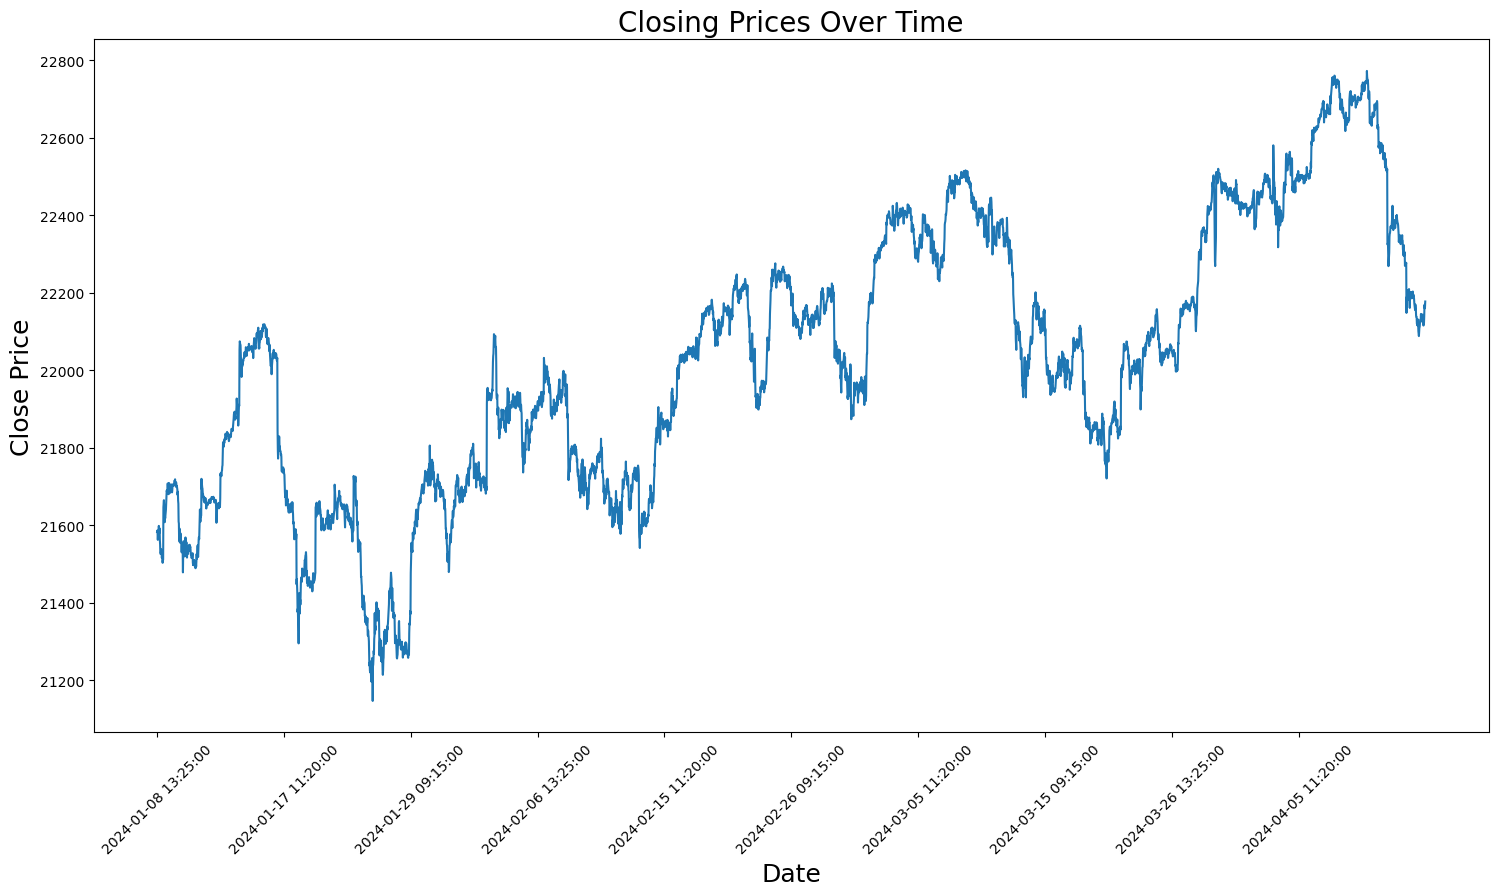

In [41]:
#https://chat.openai.com/share/683586d6-d215-4694-85ca-6844228af88b
# First calculate the close prices
close_prices = np.array(df.loc[:, 'close'])

plt.figure(figsize=(18, 9))
plt.plot(range(df.shape[0]), close_prices)
plt.xticks(range(0, df.shape[0], 500), df['datetime'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title('Closing Prices Over Time', fontsize=20)
plt.show()


In [42]:
#https://chat.openai.com/share/683586d6-d215-4694-85ca-6844228af88b
x_train = []
y_train = []
for iter in range(60, 4000):
    x_train.append(training_scaled[iter-60:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [43]:
#https://chat.openai.com/share/683586d6-d215-4694-85ca-6844228af88b
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo.fit(x_train, y_train, epochs = 10, batch_size = 32)



Epoch 1/10

124/124 [==============================] - 16s 62ms/step - loss: 0.0180
Epoch 2/10
124/124 [==============================] - 7s 60ms/step - loss: 0.0051
Epoch 3/10
124/124 [==============================] - 8s 61ms/step - loss: 0.0051
Epoch 4/10
124/124 [==============================] - 7s 58ms/step - loss: 0.0046
Epoch 5/10
124/124 [==============================] - 7s 60ms/step - loss: 0.0043
Epoch 6/10
124/124 [==============================] - 8s 61ms/step - loss: 0.0036
Epoch 7/10
124/124 [==============================] - 7s 60ms/step - loss: 0.0034
Epoch 8/10
124/124 [==============================] - 7s 59ms/step - loss: 0.0033
Epoch 9/10
124/124 [==============================] - 8s 61ms/step - loss: 0.0031
Epoch 10/10
124/124 [==============================] - 7s 60ms/step - loss: 0.0029


30/30 [==============================] - 3s 19ms/step


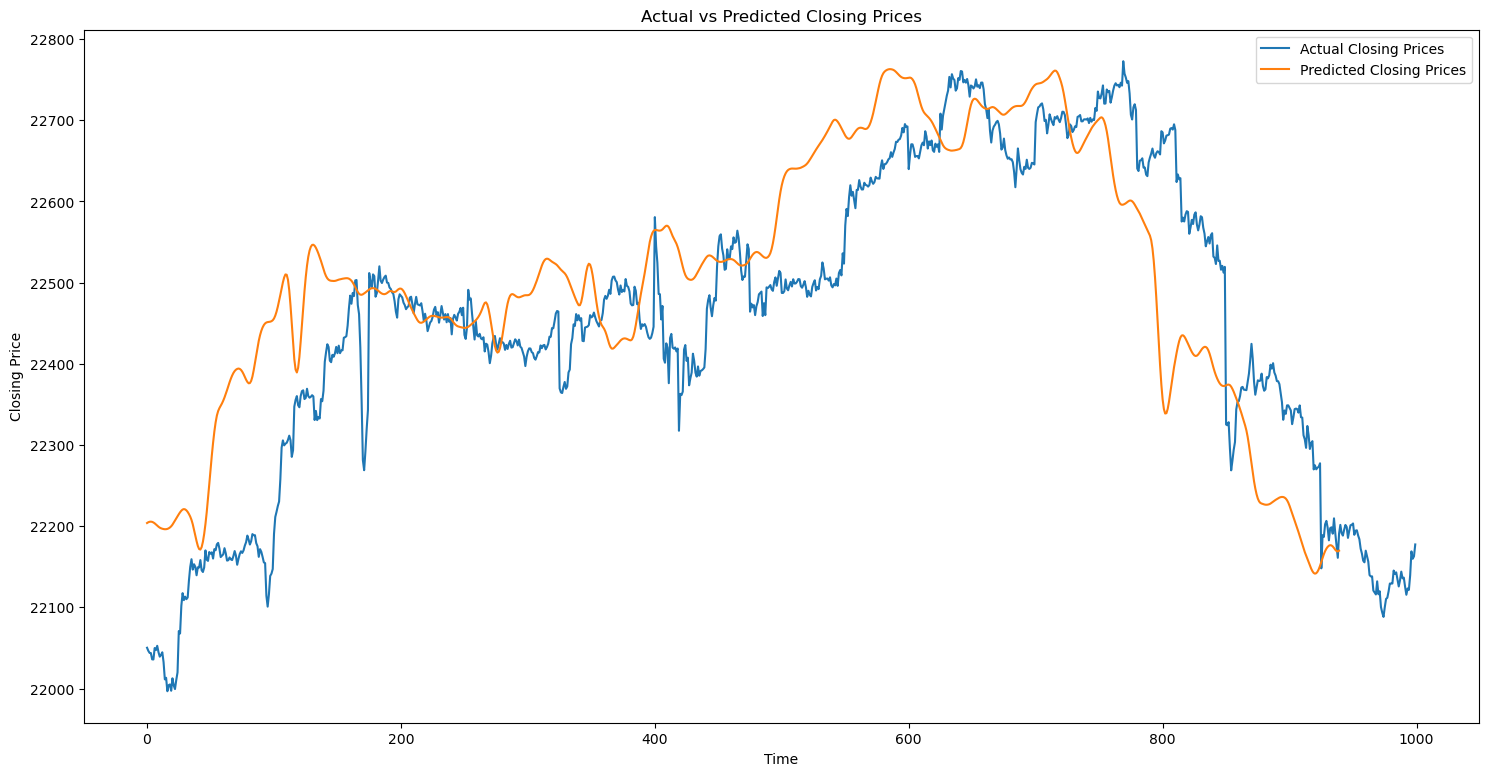

In [44]:
#https://chat.openai.com/share/683586d6-d215-4694-85ca-6844228af88b
x_test = []
for iter in range(60, len(testing_scaled)):
    x_test.append(testing_scaled[iter - 60:iter, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict prices using the model
predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

# Plot original and predicted prices
plt.figure(figsize=(18, 9))
plt.plot(testing, label='Actual Closing Prices')
plt.plot(predicted_price, label='Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

# Mid Price Prediction

It is the average price of stock

Epoch 1/10
124/124 [==============================] - 16s 63ms/step - loss: 0.0142
Epoch 2/10
124/124 [==============================] - 8s 62ms/step - loss: 0.0055
Epoch 3/10
124/124 [==============================] - 8s 61ms/step - loss: 0.0047
Epoch 4/10
124/124 [==============================] - 7s 60ms/step - loss: 0.0045
Epoch 5/10
124/124 [==============================] - 8s 61ms/step - loss: 0.0038
Epoch 6/10
124/124 [==============================] - 8s 61ms/step - loss: 0.0038
Epoch 7/10
124/124 [==============================] - 8s 61ms/step - loss: 0.0034
Epoch 8/10
124/124 [==============================] - 8s 62ms/step - loss: 0.0032
Epoch 9/10
124/124 [==============================] - 7s 60ms/step - loss: 0.0029
Epoch 10/10
30/30 [==============================] - 3s 23ms/step


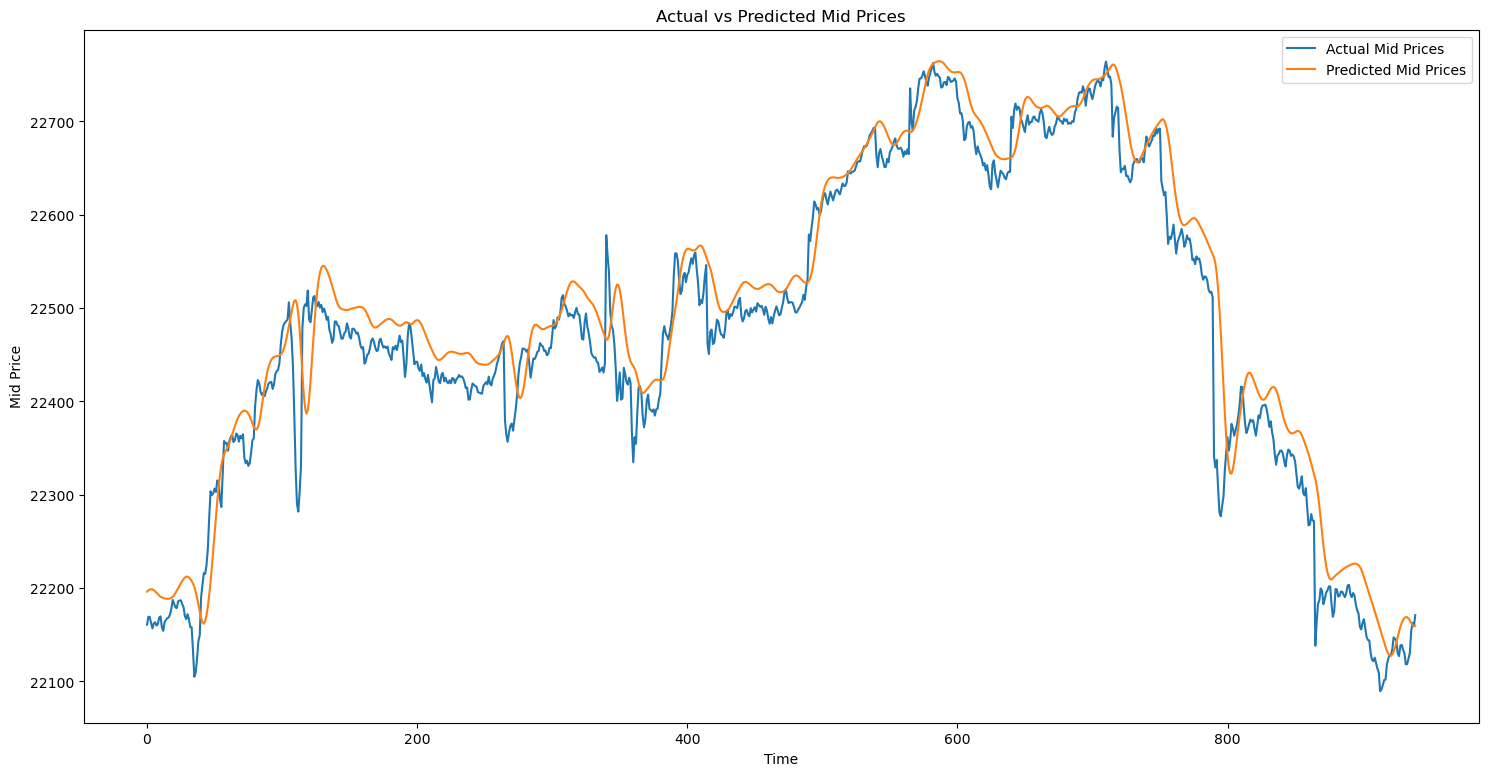

In [45]:
#https://chat.openai.com/share/683586d6-d215-4694-85ca-6844228af88b
# Prepare training and testing data
x_train = []
y_train = []

# Choose the appropriate column for training, let's assume it's the 'mid_prices' array
training_data = mid_prices[:4000]
testing_data = mid_prices[4000:]

# Scale the data
sc = MinMaxScaler(feature_range=(0, 1))
training_scaled = sc.fit_transform(training_data.reshape(-1, 1))
testing_scaled = sc.transform(testing_data.reshape(-1, 1))

# Create input sequences and corresponding labels
for i in range(60, len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the input data to fit the LSTM model input shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Prepare testing data
x_test = []
for i in range(60, len(testing_scaled)):
    x_test.append(testing_scaled[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict mid prices
predicted_mid_prices_scaled = model.predict(x_test)

# Inverse transform the predicted mid prices to get the actual mid prices
predicted_mid_prices = sc.inverse_transform(predicted_mid_prices_scaled)

# Plot actual and predicted mid prices
plt.figure(figsize=(18, 9))
plt.plot(mid_prices[4060:], label='Actual Mid Prices')  # Start index adjusted to match the testing data
plt.plot(predicted_mid_prices, label='Predicted Mid Prices')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.title('Actual vs Predicted Mid Prices')
plt.legend()
plt.show()


# SVM

Best parameters: {'C': 10, 'gamma': 'scale'}


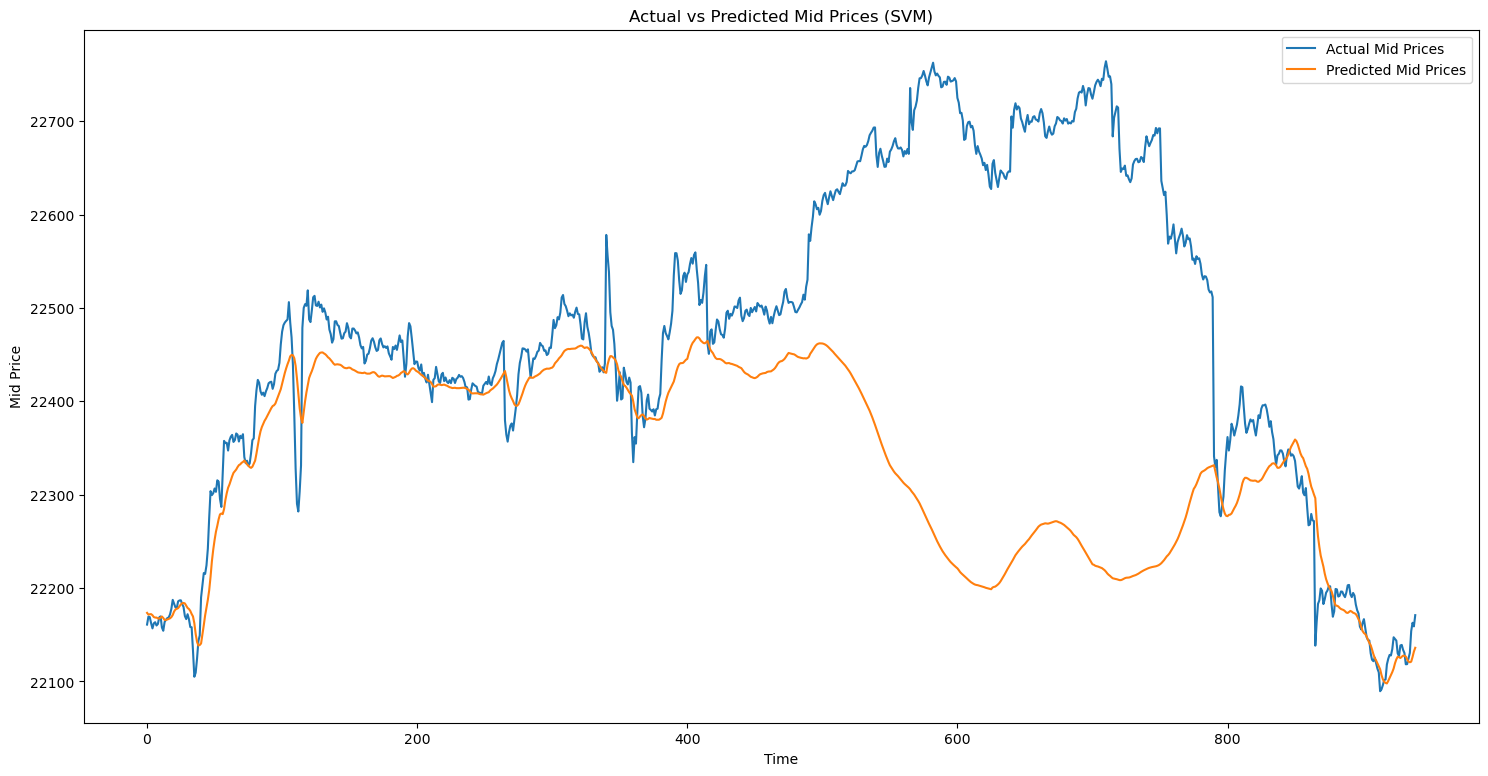

In [47]:
#https://chat.openai.com/share/dc06fdbe-1c7e-4d47-bc2b-d5696a578421
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Prepare training and testing data
x_train = []
y_train = []

# Choose the appropriate column for training, let's assume it's the 'mid_prices' array
training_data = mid_prices[:4000]
testing_data = mid_prices[4000:]

# Create input sequences and corresponding labels
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i])

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Set up parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Example values for C parameter
    'gamma': ['scale', 'auto']  # Example values for gamma parameter
}

# Initialize SVM model
svm_model = SVR(kernel='rbf')

# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Use best parameters to train the SVM model
best_svm_model = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(x_train, y_train)

# Prepare testing data
x_test = []
for i in range(60, len(testing_data)):
    x_test.append(testing_data[i-60:i])
x_test = np.array(x_test)

# Predict mid prices
predicted_mid_prices = best_svm_model.predict(x_test)

# Plot actual and predicted mid prices
plt.figure(figsize=(18, 9))
plt.plot(mid_prices[4060:], label='Actual Mid Prices')  # Start index adjusted to match the testing data
plt.plot(predicted_mid_prices, label='Predicted Mid Prices')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.title('Actual vs Predicted Mid Prices (SVM)')
plt.legend()
plt.show()


Best parameters: {'C': 10, 'gamma': 'scale'}


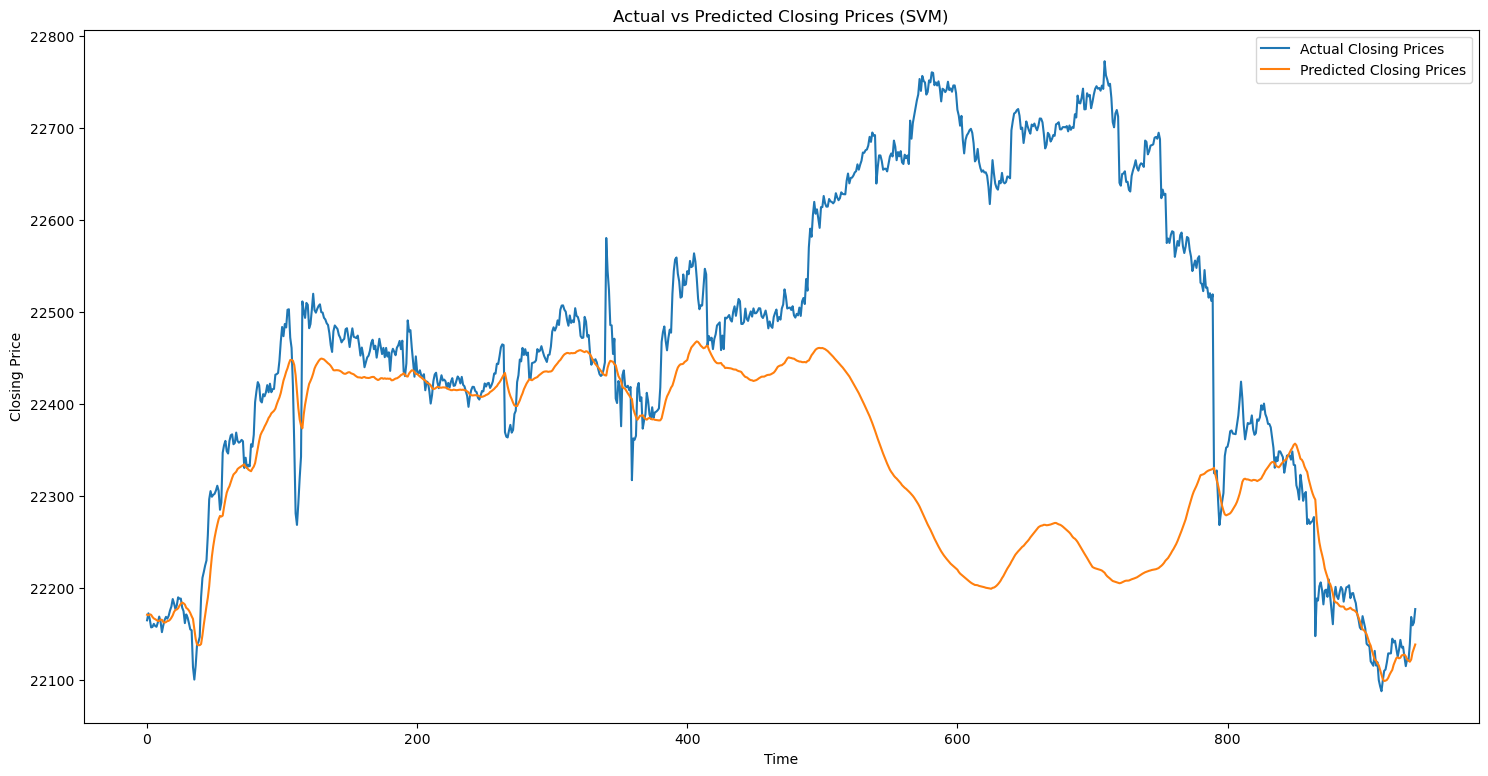

In [48]:
#https://chat.openai.com/share/dc06fdbe-1c7e-4d47-bc2b-d5696a578421
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Prepare training and testing data
x_train = []
y_train = []

# Choose the appropriate column for training, let's assume it's the 'mid_prices' array
training_data = close_prices[:4000]
testing_data = close_prices[4000:]

# Create input sequences and corresponding labels
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i])

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Set up parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Example values for C parameter
    'gamma': ['scale', 'auto']  # Example values for gamma parameter
}

# Initialize SVM model
svm_model = SVR(kernel='rbf')

# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Use best parameters to train the SVM model
best_svm_model = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(x_train, y_train)

# Prepare testing data
x_test = []
for i in range(60, len(testing_data)):
    x_test.append(testing_data[i-60:i])
x_test = np.array(x_test)

# Predict mid prices
predicted_close_prices = best_svm_model.predict(x_test)

# Plot actual and predicted mid prices
plt.figure(figsize=(18, 9))
plt.plot(close_prices[4060:], label='Actual Closing Prices')  # Start index adjusted to match the testing data
plt.plot(predicted_close_prices, label='Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices (SVM)')
plt.legend()
plt.show()


In [49]:
#https://chat.openai.com/share/dc06fdbe-1c7e-4d47-bc2b-d5696a578421
from sklearn.svm import SVR

# Assuming x_train is your input data
n_features = x_train.shape[1]
scale_value = 1 / (n_features * x_train.var())

print("Scale value for gamma:", scale_value)


Scale value for gamma: 1.9737340210420012e-07


# Random Forest

Best parameters: {'max_depth': 5, 'n_estimators': 100}


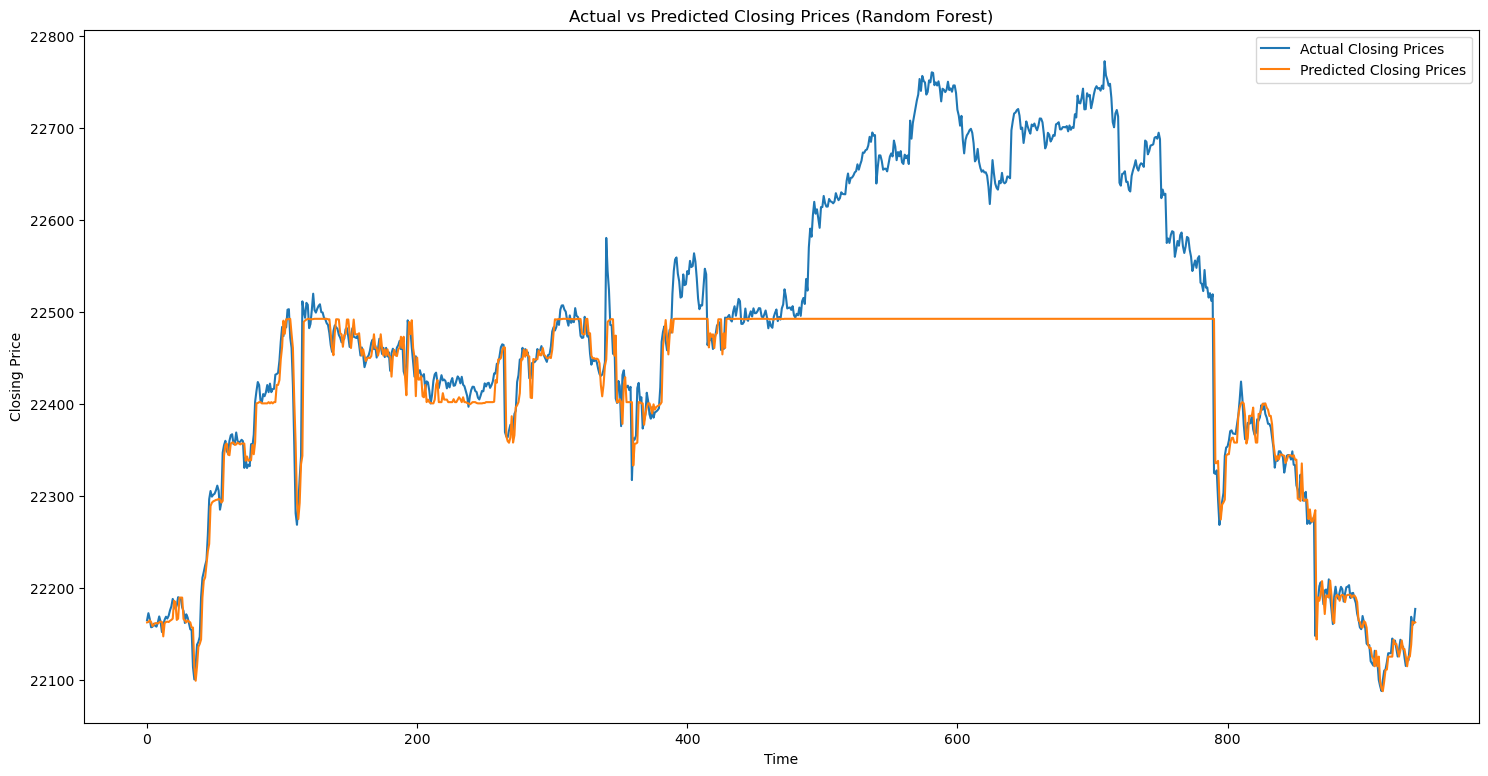

In [50]:
#https://chat.openai.com/share/dc06fdbe-1c7e-4d47-bc2b-d5696a578421
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Prepare training and testing data
x_train = []
y_train = []

# Choose the appropriate column for training, let's assume it's the 'close_prices' array
training_data = close_prices[:4000]
testing_data = close_prices[4000:]

# Create input sequences and corresponding labels
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i])

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Set up parameter grid for grid search
param_grid = {
    'n_estimators': [100],  # Fixed number of estimators to 100
    'max_depth': [5, 10, 50,100],  # Example values for maximum depth of trees
    
}

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Use best parameters to train the Random Forest model
best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                      )
best_rf_model.fit(x_train, y_train)

# Prepare testing data
x_test = []
for i in range(60, len(testing_data)):
    x_test.append(testing_data[i-60:i])
x_test = np.array(x_test)

# Predict closing prices
predicted_closing_prices = best_rf_model.predict(x_test)

# Plot actual and predicted closing prices
plt.figure(figsize=(18, 9))
plt.plot(close_prices[4060:], label='Actual Closing Prices')  # Start index adjusted to match the testing data
plt.plot(predicted_closing_prices, label='Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices (Random Forest)')
plt.legend()
plt.show()


Best parameters: {'max_depth': 50, 'n_estimators': 100}


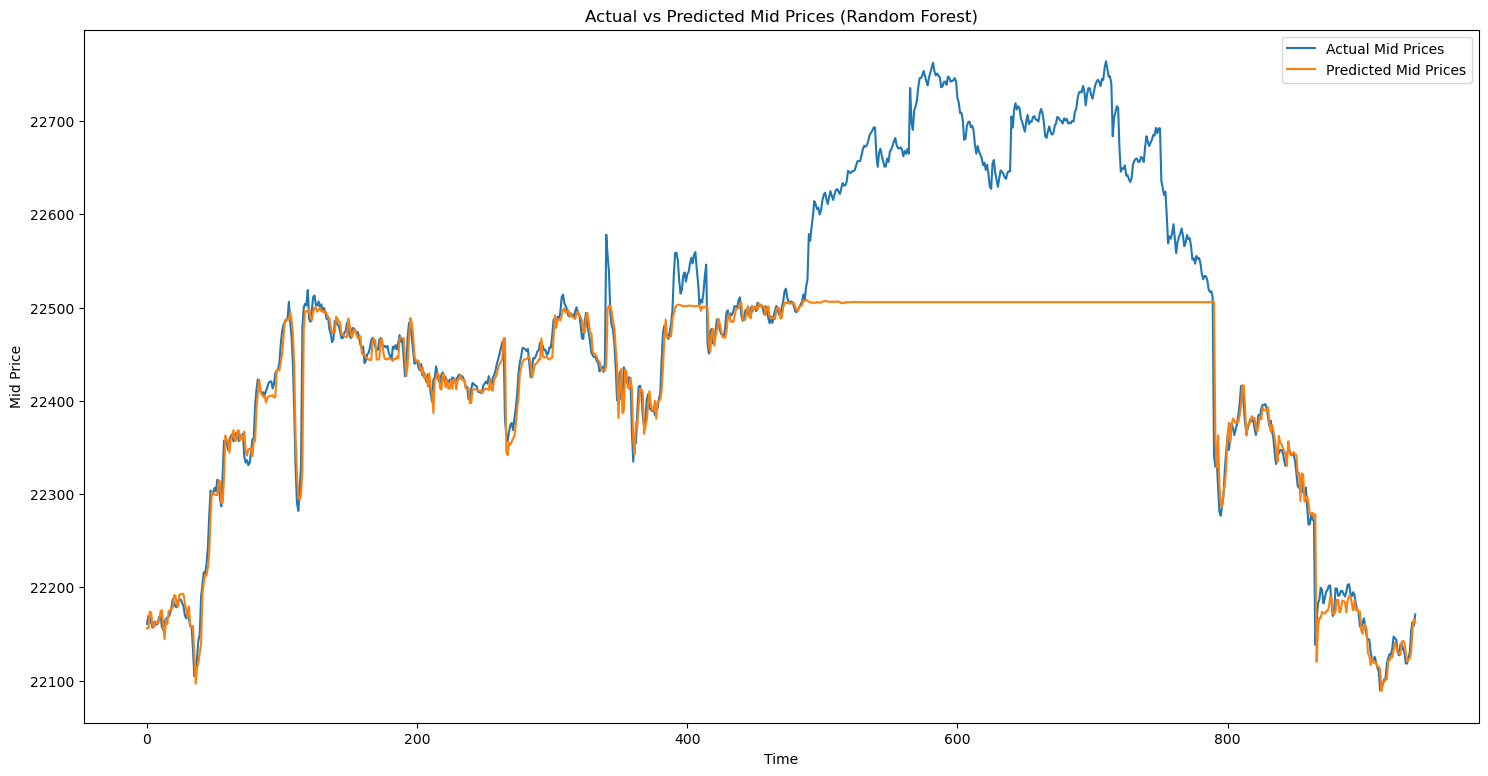

In [51]:
#https://chat.openai.com/share/dc06fdbe-1c7e-4d47-bc2b-d5696a578421
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Prepare training and testing data
x_train = []
y_train = []

# Choose the appropriate column for training, let's assume it's the 'close_prices' array
training_data = mid_prices[:4000]
testing_data = mid_prices[4000:]

# Create input sequences and corresponding labels
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i])

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Set up parameter grid for grid search
param_grid = {
    'n_estimators': [100],  # Fixed number of estimators to 100
    'max_depth': [5, 10, 50,100],  # Example values for maximum depth of trees
    
}

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Use best parameters to train the Random Forest model
best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                      )
best_rf_model.fit(x_train, y_train)

# Prepare testing data
x_test = []
for i in range(60, len(testing_data)):
    x_test.append(testing_data[i-60:i])
x_test = np.array(x_test)

# Predict closing prices
predicted_mid_prices = best_rf_model.predict(x_test)

# Plot actual and predicted closing prices
plt.figure(figsize=(18, 9))
plt.plot(mid_prices[4060:], label='Actual Mid Prices')  # Start index adjusted to match the testing data
plt.plot(predicted_mid_prices, label='Predicted Mid Prices')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.title('Actual vs Predicted Mid Prices (Random Forest)')
plt.legend()
plt.show()
